# DSE5002 Project 2
### Ryan Waterman

#### Import Libraries (Part 2.b)

In [1]:
from project_functions.connect import Connect
from project_functions.query import Query
from project_functions.transaction import Transaction
from project_functions.db_manager import DBManager
import os

#### Test Connection (Part 2.d)

Testing the connection with Pat's user information from the vault file:

*Note: Plain text usernames and passwords are still very vulnerable, even if they are in an external file. In the past, I have gotten around this by storing encrypted versions of the user and password in hidden reference files, then using code to decrypt the credentials at execution time. I won't be doing that here, but the Cryptography python library makes this relatively easy. Although not a perfect solution, but it's been enough to appease IT and IS at a defense company :).*

In [2]:
test_conn = Connect()

path = os.path.join(os.getcwd(), r'data\vault.txt')

engine = test_conn.connect(path)

User: Pat successfully connected to bank!


In [3]:
test_query = Query(test_conn)

test_query.read_query("""
                        SELECT * 
                        FROM department
                    """
                    )

,dept_id,name,trial104
0,1,Operations,T
1,2,Loans,T
2,3,Administration,T


#### Test Invalid Connection (Part 2.e)

Trying an invalid vault file name:

In [ ]:
test_conn_invalid_vault = Connect()

invalid_path1 = os.path.join(os.getcwd(), r'data\vault1.txt')

engine = test_conn_invalid_vault.connect(invalid_path1)

Error: [Errno 2] No such file or directory: 'c:\\Users\\water\\OneDrive\\GradSchool\\DSE5002_Project_2\\data\\vault1.txt'


Trying a file with invalid credentials:

In [8]:
invalid_path2 = os.path.join(os.getcwd(), r'data\vault2.txt')

engine = test_conn_invalid_vault.connect(invalid_path2)

Error: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "Not Pat"

(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Testing Transaction Database Connection (Part 4)

In [5]:
test_transaction = Transaction(test_conn)
test_transaction.retreive_transactions('01','2000')

,txn_id,txn_date,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,1,2000-01-15,CDT,100.0,None,None,2000-01-15,T
1,2,2000-01-15,CDT,100.0,None,None,2000-01-15,T
2,9,2000-01-15,CDT,100.0,None,None,2000-01-15,T


In [6]:
test_transaction_invalid = Transaction(test_conn)
test_transaction.retreive_transactions('02','2000')


Error: The entered date is invalid.


,txn_id,txn_date,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,-1,-1,-1,-1,-1,-1,-1,-1


#### Part 6, Testing DBManager class

User: Pat successfully connected to bank!


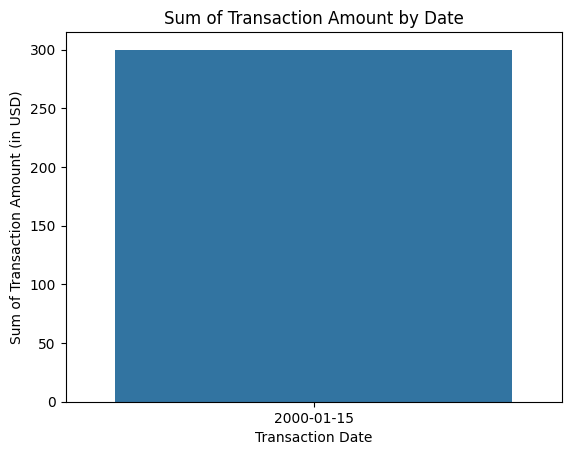

In [7]:
manager = DBManager(path)
manager.plot_transactions('01','2000')